## CNN

* https://paper.dropbox.com/doc/CNN-ZJvbCzAnDTYe71NH60HRI

In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

## Dataset

Files already downloaded and verified
torch.Size([64, 3, 32, 32])


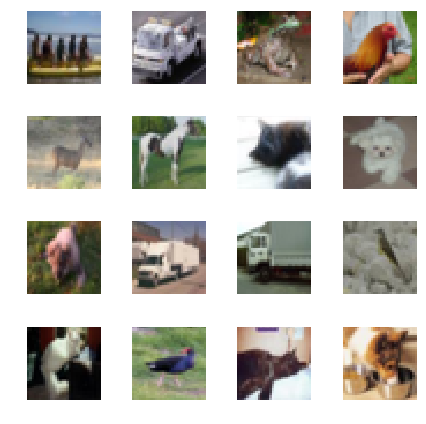

In [39]:
# CIFAR
train_loader, test_loader, classes = datasets.get_cifar_loader()
inputs,targets = next(iter(train_loader))
print(inputs.size())
utils.imgs.plot_rgb_samples(inputs)

## Im2col

* https://github.com/wiseodd/hipsternet/blob/master/hipsternet/im2col.py
* http://cs231n.github.io/convolutional-networks/#convert

## Convolution Layer

* https://wiseodd.github.io/techblog/2016/07/16/convnet-conv-layer/
* https://github.com/zishansami102/CNN-from-Scratch/blob/master/CIFAR-10/convnet.py
* https://github.com/dreamgonfly/cnn-from-scratch
* https://github.com/utkarshojha/cnn-from-scratch/blob/master/cnn.py
* https://github.com/wiseodd/hipsternet/blob/master/hipsternet/layer.py
* http://gluon.mxnet.io/chapter04_convolutional-neural-networks/cnn-scratch.html

In [27]:
class Convolution():
    def __init__(self, in_chans, n_filters, filter_size=(3,3), stride=1, padding=1):
        self.filter = None
        self.bias = None
        
    def forward(self, X):
        pass

    def backward(self, X):
        pass
    
    def __call__(self, X):
        return self.forward(X)

In [28]:
conv = Convolution()

## MaxPooling Layer

In [13]:
class MaxPool():
    def __init__(self):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, X):
        pass
    
    def __call__(self, X):
        return self.forward(X)

In [14]:
maxpool = MaxPool()

## Activation Layer

In [36]:
class ReLU():
    def __init__(self):
        pass
    
    def forward(self, X):
        return np.maximum(0, X)
    
    def backward(self, X):
        X = X.copy()
        X[X < 0] = 0
        X[X > 0] = 1
        return Z
    
    def __call__(self, X):
        return self.forward(X)

class Sigmoid():
    def __init__(self):
        pass
    
    def forward(self, X):
        return self._sigmoid(X)
    
    def backward(self, X):
        return self._sigmoid(X) * (1 - self._sigmoid(X))
        
    def _sigmoid(self, X):
        return 1.0 / (1 + np.exp(-X))
    
    def __call__(self, X):
        return self.forward(X)

In [37]:
relu = ReLU()
sigmoid = Sigmoid()

## Dropout

In [6]:
class Dropout():
    def __init__(self):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, X):
        pass
    
    def __call__(self, X):
        return self.forward(X)

In [7]:
dropout = Dropout()

## Linear

In [1]:
class Linear():
    def __init__(self):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, X):
        pass
    
    def __call__(self, X):
        return self.forward(X)

In [4]:
linear = Linear()

## Model

In [ ]:
class CNN():
    def __init__(self, input_dims):
        self.conv1 = Conv2d()
        self.relu = Relu()
        self.dropout = Dropout()
        self.maxpool = MaxPool()
        self.linear = Linear()
        self.sigmoid = Sigmoid()
    
    def forward(self, X):
        out = self.conv1(X)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.maxpool(out)
        out = flatten(out)
        out = self.linear(out)
        out = self.sigmoid(out)
        return out

## Train

## PyTorch

In [ ]:
class CNN(nn.Module):
    def __init__(self, in_shape, n_classes):
        super().__init__()
        c,w,h = in_shape
        n_pool = 3
        w = int(w / 2**n_pool)
        h = int(h / 2**n_pool)
        self.features = nn.Sequential(
            nn.Conv2d(c, 8, kernel_size=1, stride=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2), #size/2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2), #size/2
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2), #size/2
        )
        self.classifier = nn.Sequential(
            nn.Linear(128*w*h, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, n_classes),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

## Train

In [ ]:
model = CNN(in_shape=(3,32,32), n_classes=10).cuda()

In [ ]:
inputs,targets = next(iter(train_loader))
output = model(Variable(inputs.cuda()))
output.size()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
lr_adjuster = learning_rates.FixedLR(initial_lr=1e-3, iteration_type='epoch')
trainer = training.QuickTrainer()
trainer.run(model, train_loader, test_loader, criterion, optimizer, epochs=10)

In [ ]:
plt.plot(np.stack([trainer.metrics['loss']['trn'], trainer.metrics['loss']['tst']], 1))

## Sources

* https://github.com/bfortuner/ml-study/blob/master/NeuralNetworkReLU.ipynb
* https://wiseodd.github.io/techblog/2016/07/16/convnet-conv-layer/
* http://cs231n.github.io/convolutional-networks/